# 2021-02-17 Exam - Clustering

1. Load the data, the attributes are all qualitative and there is no label column, show the shape of the data and for each column show the frequencies of each distinct value (hint: you can use the numpy function unique(x, return_counts = True) (4pt)

2. Do the appropriate pre-processing in order to use the sklearn algorithms on this dataset; the values are qualitative and must be considered as nominal (4pt)

3. As an external background knowledge, we are told that for this dataset a requirement for a good clustering scheme is to have clusters with low deviation in sizes, e.g. a scheme with cluster sizes (330, 670) is less acceptable than one with (333, 333, 334). In order to obtain this, we want to compute, for each clustering scheme with n_clusters clusters and represented by the labels in y, a size deviation index with the formula: 

    np.sqrt(np.unique(y, return_counts=True) [1].var())/n_clusters

For varying number of clusters fit KMeans and compute the inertia, the silhouette index and the above-mentioned size deviation index. (4pt)

4. In this dataset the elbow method will show an almost "vanishing" elbow for inertia, and the
silhouette is totally non-effective. Make two plots, one with inertia and silhouette, another
with inertia and size deviation index, then decide the best number of clusters and refit KMeans using that value (4pt)

5. Fit another clustering method of your choice, trying to reproduce the same number of clusters you have chosen in the previous step (5pt)

6. Compare the results of the two clustering showing the result of sklearn.metrics.cluster.pair_confusion_matrix and sklearn.metrics.adjusted_rand_score (4pt)

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

url = 'exam_2021_02_17_data.csv'
random_state = 42

## 1. Load the data, the attributes are all qualitative and there is no label column, show the shape of the data and for each column show the frequencies of each distinct value (hint: you can use the numpy function unique(x, return_counts = True) (4pt)



In [81]:
df = pd.read_csv(url, sep='\t')
print('Shape is ', df.shape)
df.head()

Shape is  (1000, 3)


,F0,F1,F2
0,d,a,a
1,c,e,c
2,j,a,c
3,f,e,j
4,c,e,d


In [82]:
np.unique(df, return_counts=True)

(array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype=object),
 array([300, 298, 300, 300, 302, 300, 300, 300, 300, 300], dtype=int64))

## 2. Do the appropriate pre-processing in order to use the sklearn algorithms on this dataset; the values are qualitative and must be considered as nominal (4pt)



In [83]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(dtype=np.int32)
X = enc.fit_transform(df).toarray()
X = pd.DataFrame(X, columns=enc.get_feature_names_out())
X

,F0_a,F0_b,F0_c,F0_d,F0_e,F0_f,F0_g,F0_h,F0_i,F0_j,...,F2_a,F2_b,F2_c,F2_d,F2_e,F2_f,F2_g,F2_h,F2_i,F2_j
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
997,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
998,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


<Axes: >

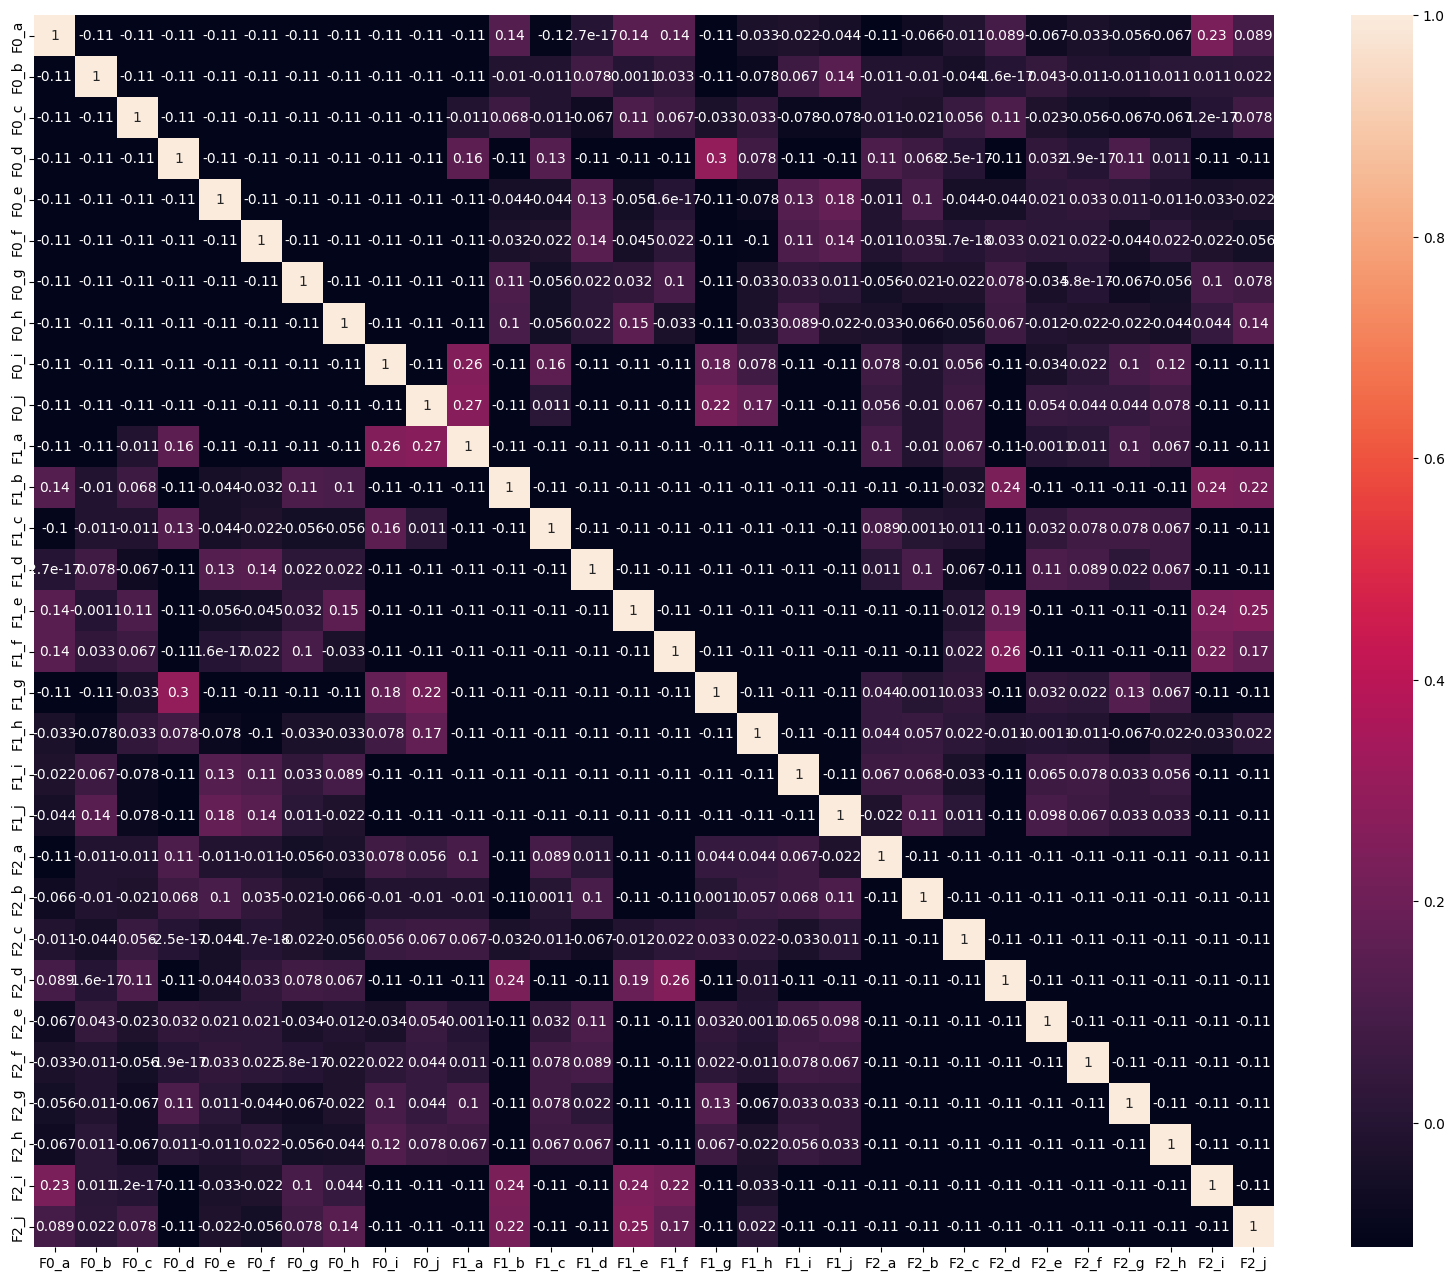

In [84]:
plt.figure(figsize=(20,16))
sns.heatmap(X.corr(), annot=True)

## 3. As an external background knowledge, we are told that for this dataset a requirement for a good clustering scheme is to have clusters with low deviation in sizes, e.g. a scheme with cluster sizes (330, 670) is less acceptable than one with (333, 333, 334). In order to obtain this, we want to compute, for each clustering scheme with n_clusters clusters and represented by the labels in y, a size deviation index with the formula: 

    np.sqrt(np.unique(y, return_counts=True) [1].var())/n_clusters

## For varying number of clusters fit KMeans and compute the inertia, the silhouette index and the above-mentioned size deviation index. (4pt)



In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_ranges = np.arange(2, 10)
silhouette_scores = []
distortion = []
size_deviation = []

for k in k_ranges:
    km = KMeans(n_clusters=k, random_state=random_state)
    y_km = km.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_km, random_state=random_state))
    distortion.append(km.inertia_)
    size_deviation.append(np.sqrt(np.unique(y_km, return_counts=True)[1].var())/k)

## 4. In this dataset the elbow method will show an almost "vanishing" elbow for inertia, and the silhouette is totally non-effective. Make two plots, one with inertia and silhouette, another with inertia and size deviation index, then decide the best number of clusters and refit KMeans using that value (4pt)



(0.0, 1.0)

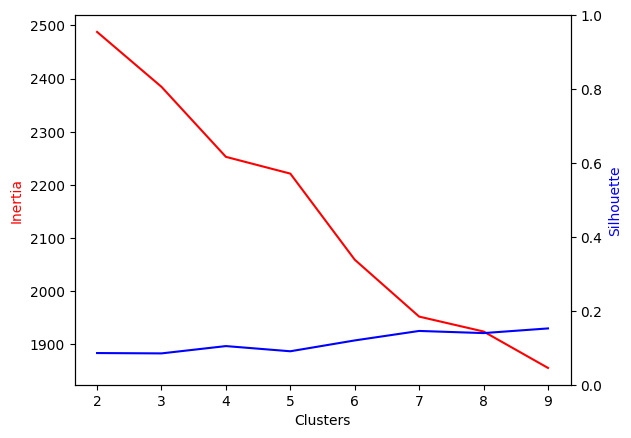

In [86]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Clusters')
ax1.set_ylabel('Inertia', color='red')
ax1.plot(k_ranges, distortion, color='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette', color='blue')
ax2.plot(k_ranges, silhouette_scores, color='blue')
ax2.set_ylim(0,1)

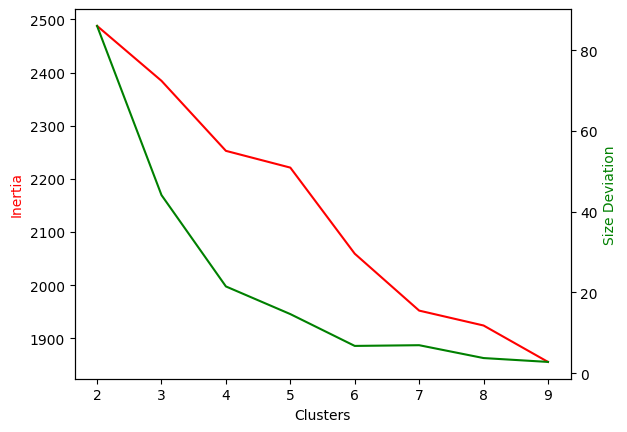

In [87]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Clusters')
ax1.set_ylabel('Inertia', color='red')
ax1.plot(k_ranges, distortion, color='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Size Deviation', color='green')
ax2.plot(k_ranges, size_deviation, color='green')

Since we want to minimize Size Deviation, looking at the second graph we can see that we have a minimum on k=9, although it would be acceptable to chose k in range [6-9]. Inertia is still really high and silhouette score is really low. I will choose k=9.

In [88]:
k = 9
km = KMeans(n_clusters=k, random_state=random_state)
y_km = km.fit_predict(X)

print('KMeans -> n_clusters: {} distortion: {:.3f} silhouette: {:.3f} size_deviation: {:.3f}'.format(k, km.inertia_, silhouette_score(X, y_km), np.sqrt(np.unique(y_km, return_counts=True)[1].var())/k))

KMeans -> n_clusters: 9 distortion: 1855.512 silhouette: 0.152 size_deviation: 2.794


## 5. Fit another clustering method of your choice, trying to reproduce the same number of clusters you have chosen in the previous step (5pt)


In [98]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid

db_params = {'eps' : np.arange(0.1, 5, 0.1), 'min_samples' : np.arange(2, 30, 5)}
params = list(ParameterGrid(db_params))

db_res = pd.DataFrame()
db_res = pd.DataFrame(columns=['num_clusters', 'eps', 'min_samples', 'silhouette', 'distortion', 'unclust%'])

for p in params:
    db = DBSCAN(**p)
    y_db = db.fit_predict(X)
    n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    if(n_clusters > 1):
        X_cl = X.iloc[y_db != -1, :]
        y_db_cl = y_db[y_db != -1]
        
        silhuette = silhouette_score(X_cl, y_db_cl, random_state=random_state)
        distortion = np.sqrt(np.unique(y_db_cl, return_counts=True)[1].var())/n_clusters
        unclust_p = (1 - y_db_cl.shape[0]/y_db.shape[0]) * 100
        
        db_res.loc[len(db_res)] = [n_clusters, db.eps, db.min_samples, silhuette, distortion, unclust_p]
    

In [99]:
db_res

,num_clusters,eps,min_samples,silhouette,distortion,unclust%
0,246.0,0.1,2.0,1.0,0.007664,8.7
1,22.0,0.1,7.0,1.0,0.057555,82.0
2,246.0,0.2,2.0,1.0,0.007664,8.7
3,22.0,0.2,7.0,1.0,0.057555,82.0
4,246.0,0.3,2.0,1.0,0.007664,8.7
5,22.0,0.3,7.0,1.0,0.057555,82.0
6,246.0,0.4,2.0,1.0,0.007664,8.7
7,22.0,0.4,7.0,1.0,0.057555,82.0
8,246.0,0.5,2.0,1.0,0.007664,8.7
9,22.0,0.5,7.0,1.0,0.057555,82.0
